# **Modelos de Regresión**

En este laboratorio se reforzará el uso de la biblioteca **scikit-learn** para implementar la regresión lineal simple y la regresión no lineal. Primero se trabajará un conjunto de datos relacionado con el consumo de combustible y la emisión de dióxido de carbono de los automóviles. Luego, se dividirán los datos en conjuntos de entrenamiento y prueba, se creará un modelo usando el conjunto de entrenamiento, se evaluará su modelo usando el conjunto de prueba y finalmente se usará el modelo para predecir el valor desconocido.

Si los datos muestran una tendencia con curvas, la regresión lineal no producirá resultados muy precisos en comparación con una regresión no lineal porque, como su nombre lo indica, la regresión lineal supone que los datos son lineales. Por este motivo, se reforzarán los conceptos sobre regresiones no lineales y se aplicará en un ejemplo con un conjunto de datos relacionado con el PIB de China desde 1960 hasta 2014.

## Tabla de Contenidos

1.  [Importar y Preparar los Datos de Análisis](#2)
2.  [Modelo de Regresión Simple](#4)
3.  [Modelos de Regresión No Lineales](#6)
4.  [Ejemplo de una Regresión No Lineal](#8)

# 1. Importar y Preparar los Datos de Análisis <a id="2"></a>

## Carga y Preparación de Datos

Instalar e importar Bibliotecas:

In [34]:
# Instalar bibliotecas específicas para trabajar en el laboratorio

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install sklearn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\HP SSD\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\HP SSD\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\HP SSD\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\HP SSD\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Importar los paquetes de procesamiento y visualización de datos **pandas**, **numpy**, **matplotlib**, **sklearn** y **scipy**. No olvidar de poner `% matplotlib inline` para que las gráficas puedan aparecer en *Jupyter Notebook*.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

## Leer el Conjunto de Datos

Actualmente, se tiene clasificado el apoyo que brindan los padres a estudiantes de secundaria en cinco grupos. Si la utilización de los datos demográficos puede servirnos para predecir a que grupo pertenecen, el establecimiento educativo podría tomar medidas oportunas para potenciar el apoyo en la relación entre estudiantes y padres, en beneficio del desempeño estudiantil de los hijos. Así, esto sería un problema de clasificación. Es decir, dado el conjunto de datos con etiquetas predefinidas, se necesita construir un modelo para predecir la clase de un caso nuevo o desconocido.

Para este caso, se usarán datos demográficos, como Edad, Género, Etnicidad y Nivel Educativo de los Padres.

El campo de destino, llamado `ParentalSupport`, tiene cinco valores posibles que corresponden a los cinco niveles de apoyo de los padres, de la siguiente manera:

0. Ninguno
1. Bajo
2. Moderado
3. Alto
4. Muy alto



Cargar los datos y guardarlos en el dataframe `df`:

In [36]:
# ruta de datos y leer los datos para guardarlos en df

path='datos/Student_performance_data _.csv'
df = pd.read_csv(path)

In [37]:
# mostrar los 5 primeros registros de conjunto de datos

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Pre-procesamiento de los Datos

Primero se va a realizar un rápido análisis y visualización de los Datos. Se utilizara el metodo `df.value_counts()`, para observar cuántos clientes hay en cada clase en el conjunto de datos.

In [38]:
df['GradeClass'].value_counts()

4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: GradeClass, dtype: int64

Como se puede observar, hay 212 clientes en Ninguno (0), 254 clientes en Muy alto (4), 489 clientes en Bajo (1), 697 clientes en Alto (3) y 740 clientes en Moderado (2).

In [69]:
df[["Absences", "GradeClass"]].corr()

,Absences,GradeClass
Absences,1.000000,0.728633
GradeClass,0.728633,1.000000


In [39]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [40]:
X = df[['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation','StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport','Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']].values  #.astype(float)
X[0:5]


array([[1.00100000e+03, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 1.98337228e+01, 7.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.92919559e+00],
       [1.00200000e+03, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.54087561e+01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.04291483e+00],
       [1.00300000e+03, 1.50000000e+01, 0.00000000e+00, 2.00000000e+00,
        3.00000000e+00, 4.21056977e+00, 2.60000000e+01, 0.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.12602254e-01],
       [1.00400000e+03, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.00000000e+00, 1.00288295e+01, 1.40000000e+01, 0.00000000e+00,
        3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.000

In [41]:
y = df['GradeClass'].values
y[0:5]

array([2., 1., 4., 3., 4.])

In [42]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.73132686,  0.47291901,  0.97849211, -0.85339088,  0.25371131,
         1.78033552, -0.89082237,  1.52237132, -0.10874395, -0.78847633,
        -0.66013204,  2.01954358, -0.43186565,  1.11808631],
       [-1.72987865,  1.36294441, -1.02198065, -0.85339088, -0.7460868 ,
         0.99737625, -1.71769358, -0.65686997, -0.99955054, -0.78847633,
        -0.66013204, -0.49516139, -0.43186565,  1.24237446],
       [-1.72843045, -1.30713178, -1.02198065,  1.09164102,  1.25350942,
        -0.98404514,  1.35354235, -0.65686997, -0.10874395, -0.78847633,
        -0.66013204, -0.49516139, -0.43186565, -1.96027719],
       [-1.72698225,  0.47291901,  0.97849211, -0.85339088,  1.25350942,
         0.04544517, -0.06395116, -0.65686997,  0.78206265,  1.2682689 ,
        -0.66013204, -0.49516139, -0.43186565,  0.1617897 ],
       [-1.72553404,  0.47291901,  0.97849211, -0.85339088,  0.25371131,
        -0.90231145,  0.29042222,  1.52237132,  0.78206265, -0.78847633,
        -0.66013204, -0.49

## Configuración modelo

In [43]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X_entrena.shape,  y_entrena.shape)
print ('Conjunto de Prueba:', X_prueba.shape,  y_prueba.shape)

Conjunto de Entrenamiento set: (1913, 14) (1913,)
Conjunto de Prueba: (479, 14) (479,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
k = 9

# Crear y entrenar el modelo y pronosticar  
vecino = KNeighborsClassifier(n_neighbors = k)
vecino.fit(X_entrena,y_entrena)
vecino

KNeighborsClassifier(n_neighbors=9)

In [46]:
y_hat = vecino.predict(X_prueba)
y_hat[0:5]

array([4., 4., 4., 4., 4.])

In [47]:
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y_entrena, vecino.predict(X_entrena)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y_prueba, y_hat))

Precisión del conjunto de entrenamiento:  0.7375849451123889
Precisión del conjunto de prueba:  0.6680584551148225


In [48]:
Ks = 20
prec_promedio = np.zeros((Ks-1))
prec_estandar = np.zeros((Ks-1))
matriz_confusion = [];
for n in range(1,Ks):
    # Entrena el modelo y pronostica  
    vecino_n = KNeighborsClassifier(n_neighbors = n).fit(X_entrena,y_entrena)
    y_hat=vecino_n.predict(X_prueba)
    prec_promedio[n-1] = metrics.accuracy_score(y_prueba, y_hat)
    prec_estandar[n-1] = np.std(y_hat==y_prueba)/np.sqrt(y_hat.shape[0])

print('Precisión promedio: ',prec_promedio)
print('Precisión desviación estándar: ',prec_estandar)

Precisión promedio:  [0.6263048  0.56993737 0.58872651 0.61795407 0.64926931 0.65553236
 0.64926931 0.66388309 0.66805846 0.67223382 0.67640919 0.69311065
 0.69102296 0.69102296 0.6868476  0.68893528 0.69728601 0.70354906
 0.70772443]
Precisión desviación estándar:  [0.02210466 0.02262099 0.02248301 0.02220077 0.02180377 0.02171218
 0.02180377 0.02158357 0.02151643 0.02144739 0.02137643 0.02107291
 0.02111259 0.02111259 0.02119046 0.02115178 0.02099201 0.0208668
 0.02078072]


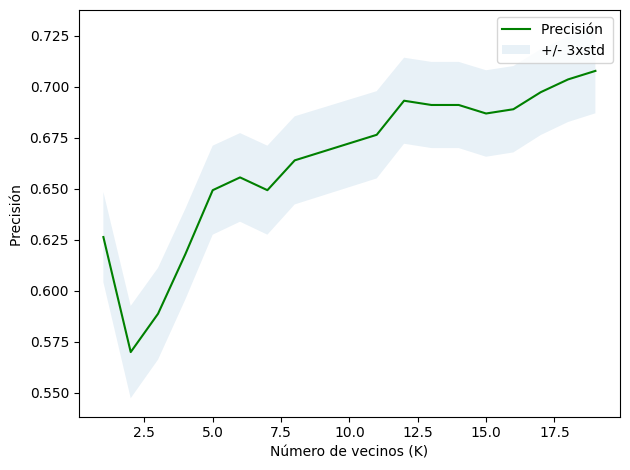

In [49]:
plt.plot(range(1,Ks),prec_promedio,'g')
plt.fill_between(range(1,Ks),prec_promedio - 1 * prec_estandar,prec_promedio + 1 * prec_estandar, alpha=0.10)
plt.legend(('Precisión ', '+/- 3xstd'))
plt.ylabel('Precisión ')
plt.xlabel('Número de vecinos (K)')
plt.tight_layout()
plt.show()

In [50]:
print( "La mejor precisión se obtuvo con", prec_promedio.max(), "con k=", prec_promedio.argmax()+1) 

La mejor precisión se obtuvo con 0.7077244258872651 con k= 19


In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=1)
plt.title('Coorelation Matrix Heatmap')
plt.show()